# Исследование данных о продажах игр.

Мы имеем данные до 2016 года о продажах игр, оценках пользователей и экспертов, жанрах и платформах. 

<b> Цель:</b>  
выявить закономерности, определяющие успешность компьютерной игры.

<b> Задачи: </b>

- провести предобработку данных

- провести исследовательский анализ данных: определить срок жизни платформы, потенциально прибыльные платформы,  выяснить, влияют ли отзывы пользователей и критиков на продажи, определить прибыльные жанры

- составить портрет пользователей каждого региона

- проверить две гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые; средние пользовательские рейтинги жанров Action и Sports разные.

<b> Описание данных: </b>

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Откроем файл с данными и изучим общую информацию. 

In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [191]:
data = pd.read_csv('/datasets/games.csv')

In [192]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<b> Вывод: </b> В данном разделе мы загрузили данные из csv-файла в датафрейм. Используя метод head(), ознакомились с первыми строками таблицы. Метод info() позволил нам определить, количество строк в таблице (16715), названия столбцов таблицы, тип данных в столбцах, а также наличие большого количества пропущенных значений (40-50%) в столбцах 'Сritic_Score", 'User_Score', 'Rating'.

### Предобработка данных

In [194]:
data.columns = [x.lower() for x in data.columns] #переведем названия всех столбцов в змеиный регистр

In [195]:
data.isna().sum().sort_values(ascending=False) #определим количество пропущенный значений в столбцах датафрейма

critic_score       8578
rating             6766
user_score         6701
year_of_release     269
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

In [196]:
pd.DataFrame(round(data.isna().mean()*100,10)).style.background_gradient('coolwarm')
#Определим количество пропусков в %:

,0
name,0.011965
platform,0.000000
year_of_release,1.609333
genre,0.011965
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.319174
user_score,40.089740


In [197]:
#удалим строки с пропущенными значениями в столбце 'year_of_release'
data = data.dropna(subset=['year_of_release'])

Заменим типы данных в столбцах 'year_of_release', 'critic_score' нa целочисленный тип, так как год выпуска игры и рейтинг критиков - целые числа от 0 до 100.

In [198]:
data['year_of_release'] = pd.to_numeric(data['year_of_release'], errors='coerce').astype('int')
data['critic_score'] = pd.to_numeric(data['critic_score'], downcast='integer')

In [199]:
sorted(data['critic_score'].unique()) 
#отсортируем список уникальных значений столбца 'critic_score', видим что нестандартных значений нет 


[13.0,
 17.0,
 19.0,
 20.0,
 21.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 57.0,
 63.0,
 65.0,
 69.0,
 76.0,
 nan,
 49.0,
 56.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 64.0,
 66.0,
 67.0,
 68.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0]

In [200]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце 'user_score' присутствует значение 'tbd', что в терминологии игр обозначает "будет определено", значит в данном случае рейтинг не известен, т.е. можно заменить его на значение Nan.  

In [201]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)

Заполнять пропущенные значения в столбцах 'user_score' и 'critic_score' мы не будем, так как их большое количество и они могут исказить корреляцию. Даже оценки одной и той же игры на разных платформах могут значительно отличаться. Такое большое количество пропущенных значений в столбцах  можно объяснить отсутствием продуманного механизма сбора оценок (программными недоработками), или сбоями выгрузки данных. 

In [202]:
# теперь можно изменить тип в столбце 'user_score' со строкового на вещественный,
# поскольку оценки пользователей лежат в диапазоне от 0 до 10 
data['user_score'] = pd.to_numeric(data['user_score'], errors="coerce")

In [203]:
#удалим строки с пропущенными значениями в столбце 'genre', таких строки всего 2.
data = data.dropna(subset=['genre'])

In [204]:
data['rating'].unique() #выведем уникальные значения в столбце rating и изучим их, воспользуясь интернет-ресурсами.
 

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [205]:
#выясняем, что рейтинг 'RP' означает 'не определен'. Поэтому мы все значения nan и 'RP' заменим на 'unkown'
data['rating'] = data['rating'].fillna('unkown')
data['rating'] = data['rating'].replace('RP', 'unkown')

In [206]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [207]:
#проверим датафрейм на наличие дубликатов
data.duplicated().sum()

0

In [208]:
# создадим столбец 'sum_sales', в котором вычислим суммарный объем продаж (в миллионах копий) каждой игры 
data['sum_sales'] =  data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']


Выводы: данном разделе мы провели предобработку данных, и именно:

- перевели названия столбцов в змеиный регистр;

- удалили 271 строку с пропущенными значениями в столбцах year_of_release, name, genre (1,6% от всего датасета)

- заменили пропущенные значения в столбцах 'rating'

- исправили некоторые неподходящие значения в столбце 'user_score'

- заменили тип данных в столбцах year_of_release, 'critic_score' на целочисленный, в столбце 'user_score' на вещественный.

- создали столбец 'sum_sales' для отображения суммарных продаж по каждой игре.


### Исследовательский анализ данных

Определим количество игр, выпускаемых в разные годы. 

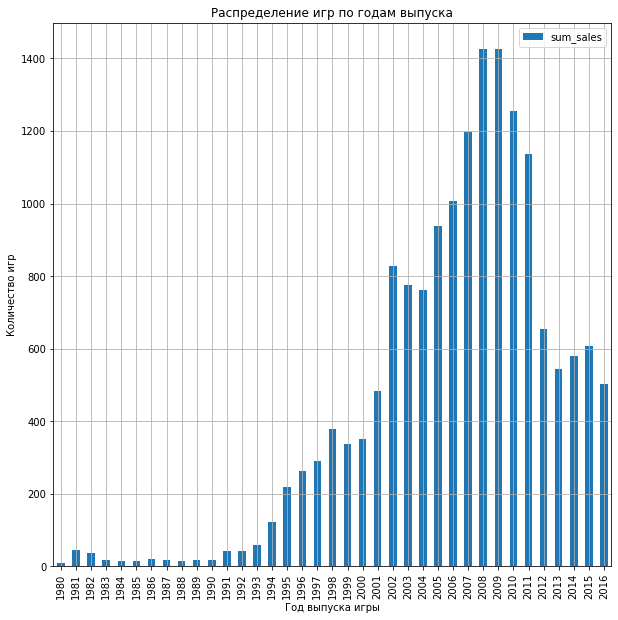

In [209]:
(
    data.pivot_table(index='year_of_release', values='sum_sales', aggfunc='count')
    .plot(kind='bar', grid=True, figsize=(10, 10), title='Распределение игр по годам выпуска')
)
plt.xlabel("Год выпуска игры")
plt.ylabel("Количество игр")
plt.show();

По данному графику делаем вывод, что максимальное количество игр выпускалось в 2008, 2009 году (более 1400 игр). Бурный рост игровой индустрии начался в 2002 году и продолжался до 2009. Начиная с 2009 количество игр падает. Возможная причина - переход на мобильные платформы.  

Выясним, как менялись продажи по платформам.

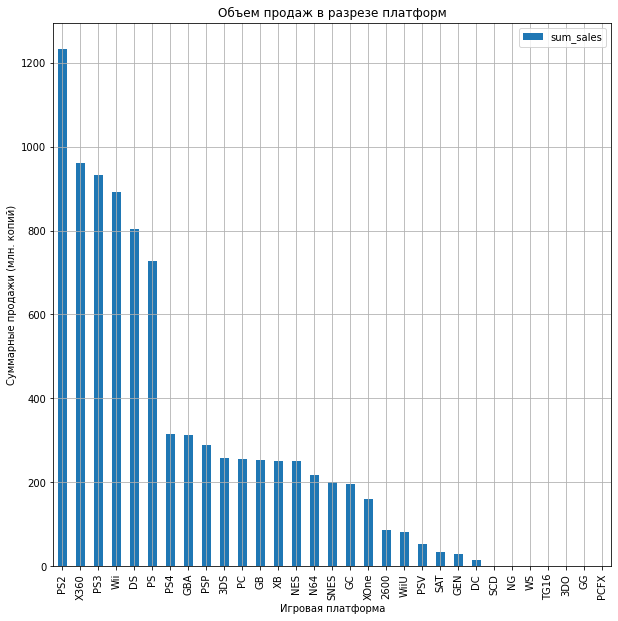

In [210]:
(
   data.pivot_table(index= 'platform', values = 'sum_sales', aggfunc='sum')
    .sort_values(by='sum_sales', ascending=False)
    .plot(grid=True, kind = 'bar', title='Объем продаж в разрезе платформ', figsize=(10, 10))
)
plt.xlabel("Игровая платформа")
plt.ylabel("Суммарные продажи (млн. копий)")
plt.show();

Построим распределения по годам для платформ с наибольшими суммарными  продажами, и именно PS2, PS3, X360, Wii, DS, PS.

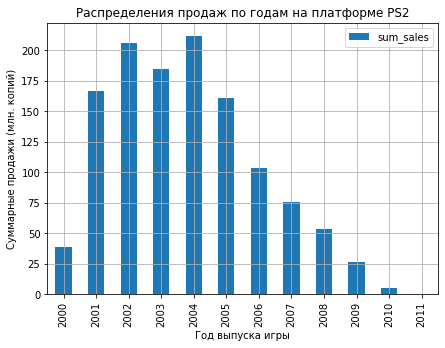

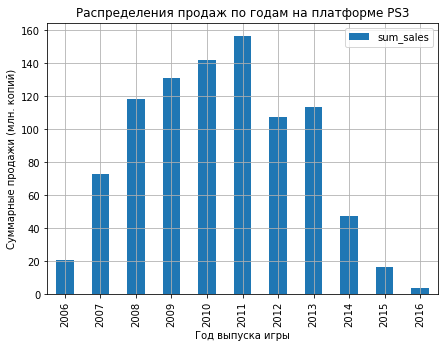

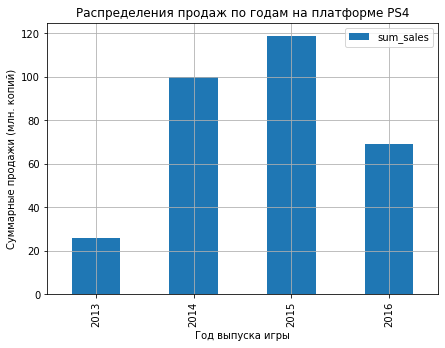

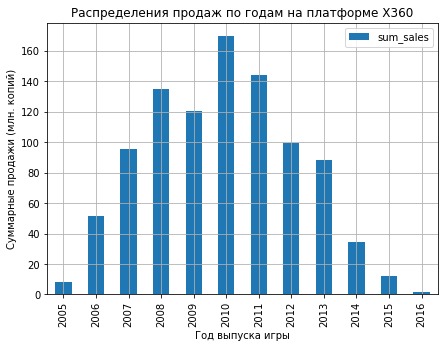

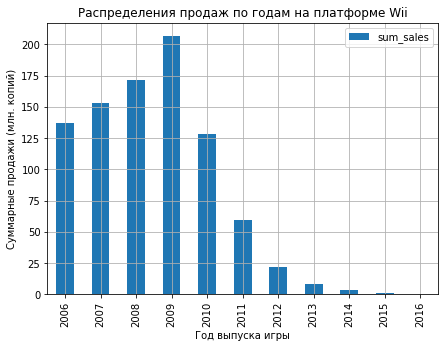

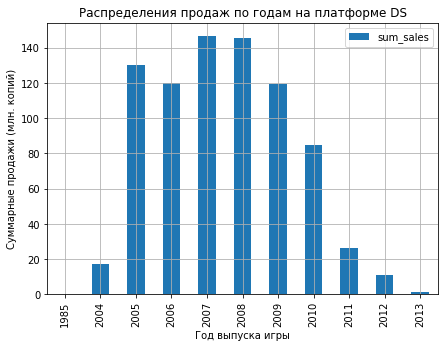

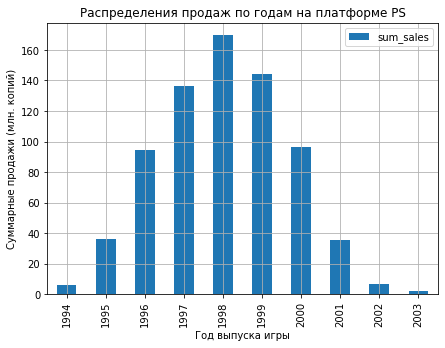

In [211]:
def sales(data,x):
    message = f"Pаспределения продаж по годам на платформе {x}"
    (
        data[data['platform'] == x]
        .pivot_table(index= 'year_of_release', values = 'sum_sales', aggfunc='sum')
        .plot(grid=True, kind = 'bar', figsize=(7, 5))
    )
    plt.title(message)
    plt.xlabel('Год выпуска игры')
    plt.ylabel('Суммарные продажи (млн. копий)')
    plt.show();
for k in ['PS2','PS3','PS4','X360','Wii','DS','PS']:
    sales(data,k)
    

Проанализировав эти графики, можно сделать вывод, что среднее время "жизни" платформы около 10-12 лет. Пик продаж по данных платформам в среднем приходится на 5-6 год внедрения.  Поэтому имеет смысл  определить "молодые" (потенциально прибыльные) платформы, которые появились за последние 4-5 лет и имеют потенциал для развития.

In [212]:
data_2012 = data.query('year_of_release >= 2012') 
#Сделаем срез нашего датасета, поместив в него игры с 2012 года

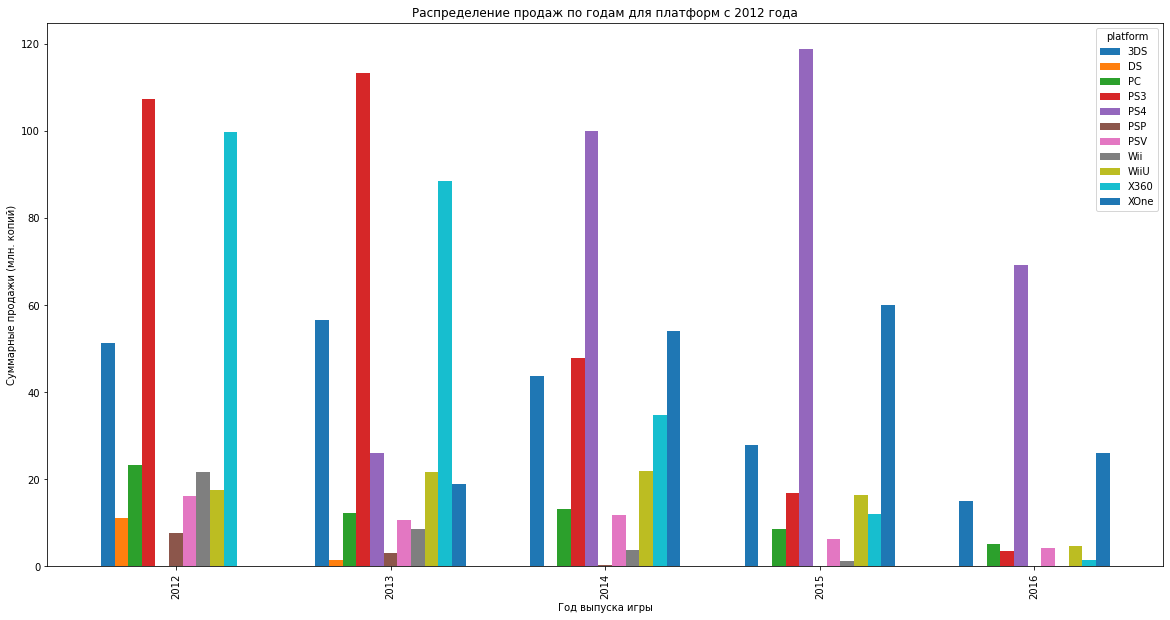

In [213]:
#построим график распределения продаж по годам для платформ, начиная с 2012 года
(
    data_2012
    .pivot_table(index=['year_of_release'], columns = ['platform'], values='sum_sales', aggfunc='sum')
    .plot(kind='bar', figsize=(20,10), width=0.7, title='Распределение продаж по годам для платформ с 2012 года')
)
plt.xlabel("Год выпуска игры")
plt.ylabel("Суммарные продажи (млн. копий)")
plt.show();

Как видно по графику, платформы PS4 (фиолетовая) и XOne(синяя) были внедрены только в 2013 году, их продажи идут по нарастающей и "проживут" эти платформы до 2023 - 2025 года. Пик популярности платформ  PS3 и X360 уже пройден, на смену им приходят платформы PS4 и XOne. 

Для уточнения данных по платформам WiiU и 3DS построим столбчатые диаграммы.

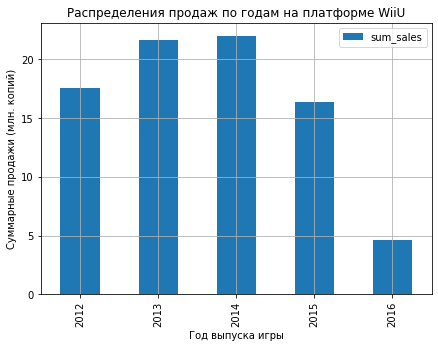

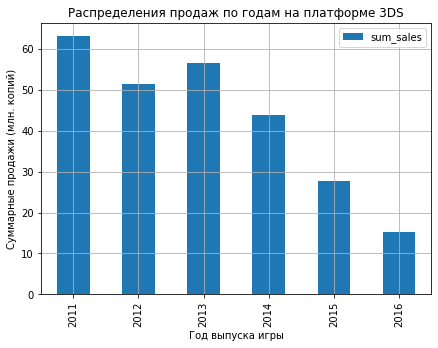

In [214]:
for k in ['WiiU','3DS']:
    sales(data,k)

Платформы 3DS и WiiU были внедрены немного раньше (в 2011 и 2012 годах соответственно), и судя по графикам, пик продаж у них пройден в 2013-2014 годам.

Резюмируя вышеизложенное, можно выделить 2 потенциально прибыльные, "молодые" платформы PS4, XOne, выпущенные в 2013 году, но и платформы 3DS и WiiU еще рано списывать со счетов. Разумным будет анализировать данные с 2013 года. Данные за 2016 год не полные, поэтому суммы продаж за этот год необъективны.

Определим самые прибыльные платформы с 2013 по 2016 год

In [215]:
data_2013 = data.query('year_of_release >= 2013')

In [216]:
data_top_plat = data_2013.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales',
                                                                                                       ascending=False)
data_top_plat['Процент'] = (data_top_plat['sum_sales']/data_2013['sum_sales'].sum()).apply(lambda x: format(x, '.2%'))
data_top_plat

,sum_sales,Процент
platform,,
PS4,314.14,28.80%
PS3,181.43,16.63%
XOne,159.32,14.61%
3DS,143.25,13.13%
X360,136.80,12.54%
WiiU,64.63,5.93%
PC,39.43,3.62%
PSV,32.99,3.02%
Wii,13.66,1.25%


Самые прибыльные платформы PS4, PS3, XOne, 3DS, X360. На их долю приходится более 80% от суммарных продаж за период.  

Построим график "яшик с усами" для платформ c 2013 года

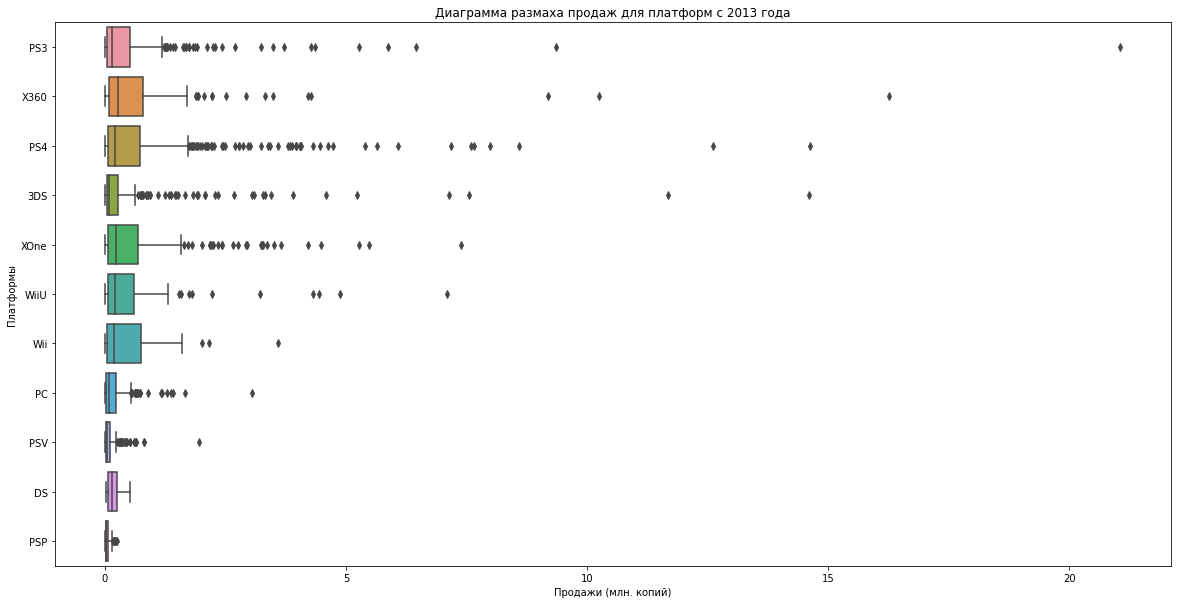

In [217]:
fig, ax = plt.subplots(figsize=(20, 10))
platform = data_2013['platform']
sns.boxplot(x=data_2013['sum_sales'], y=platform, ax=ax)
plt.title('Диаграмма размаха продаж для платформ с 2013 года')
plt.xlabel('Продажи (млн. копий)')
plt.ylabel('Платформы')
plt.show();


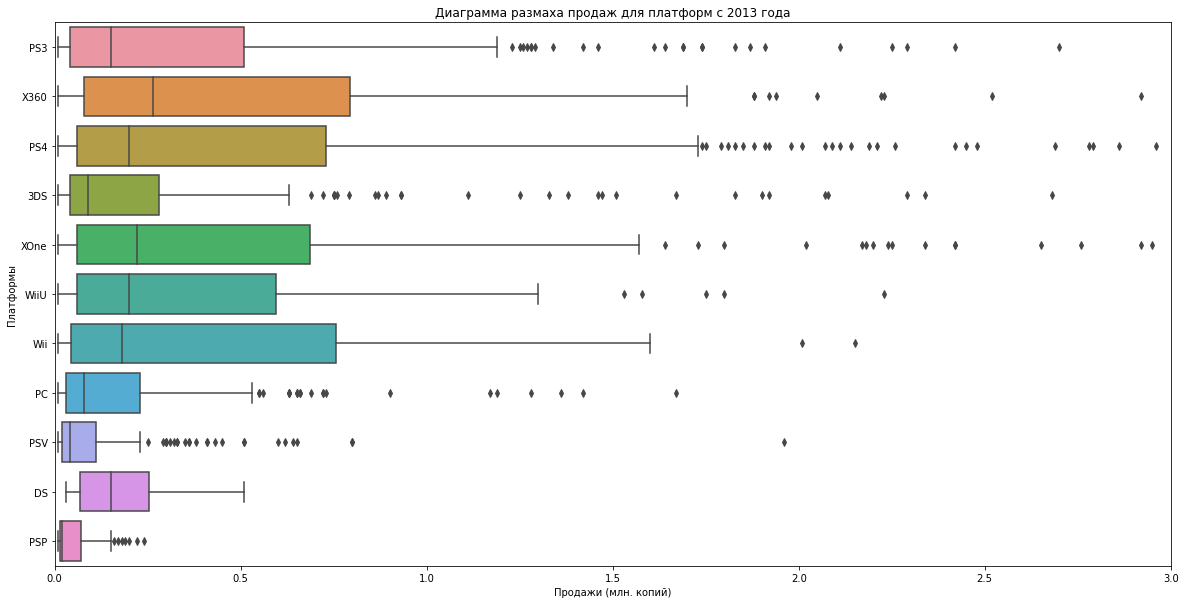

In [218]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(x=data_2013['sum_sales'], y=platform, ax=ax)
plt.xlim(0, 3)
plt.title('Диаграмма размаха продаж для платформ с 2013 года')
plt.xlabel('Продажи (млн. копий)')
plt.ylabel('Платформы')
plt.show();

 По данным графикам мы видим, что есть определенное количество суперпопулярных игр (выбросов) на платформах PS3, PS4, X360, 3DS, число копий которых превышает 8 миллионов. По длинным усам и длинным ящикам платформ PS3, PS4, X360, XOne, Wii, WiiU можно сделать вывод, что платформах присутствует значительный разброс продаж и для 75% игр продажи составляют до 800 тысяч копий. У платформы 3DS усы и ящик значительно короче при значительном количестве выбросов, значит разброс продаж не велик и медианное значение продаж всего лишь около 100 тыс. копий, а значит итоговое 4 место по суммарным продажам данная платформа занимает за счет небольшого количества игр с аномальными продажами. 

Рассмотрим, как влияют на продажи внутри платформы PS4 отзывы пользователей и критиков.

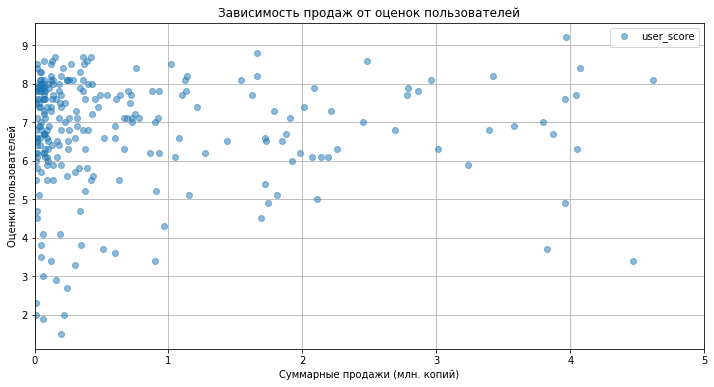

In [219]:
(
    data_2013
    .query('platform == "PS4"')
    .plot(x='sum_sales',
          y='user_score',
          style='o',
          grid=True,
          xlim=(0, 5),
          figsize=(12,6),
          alpha=0.5)
)
plt.title('Зависимость продаж от оценок пользователей')
plt.xlabel('Суммарные продажи (млн. копий)')
plt.ylabel('Оценки пользователей')
plt.show();

In [220]:
data_2013.query('platform == "PS4"')['user_score'].corr(data_2013['sum_sales'])

-0.031957110204556376

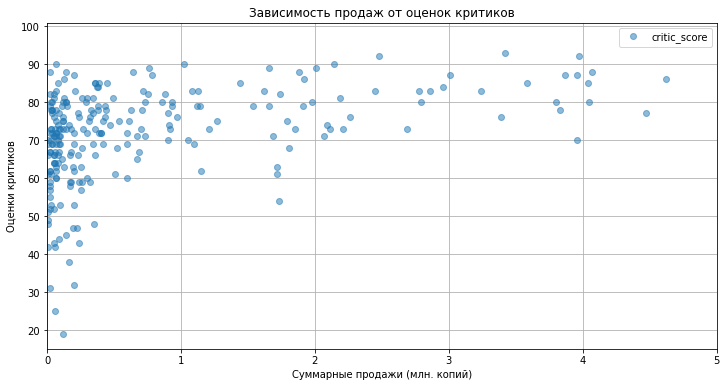

In [221]:
(
    data_2013
    .query('platform == "PS4"')
    .plot(x='sum_sales',
          y='critic_score',
          style='o',
          grid=True,
          xlim=(0, 5),
          figsize=(12,6),
          alpha=0.5)
)
plt.title('Зависимость продаж от оценок критиков')
plt.xlabel('Суммарные продажи (млн. копий)')
plt.ylabel('Оценки критиков')
plt.show();

In [222]:
data_2013.query('platform == "PS4"')['critic_score'].corr(data_2013['sum_sales'])

0.40656790206178095

In [223]:
cor_user={}
for k in ['PS3','X360', 'XOne','3DS','WiiU']:
    data_plat = data_2013[data_2013['platform'] == k]
    m = data_plat['user_score'].corr(data_plat['sum_sales'])
    cor_user[k] = m
print(cor_user)   

{'PS3': 0.0023944027357566925, 'X360': -0.011742185147181342, 'XOne': -0.06892505328279414, '3DS': 0.24150411773563016, 'WiiU': 0.4193304819266187}


In [224]:
cor_critic={}
for k in ['PS3','X360', 'XOne','3DS','WiiU']:
    data_plat = data_2013[data_2013['platform'] == k]
    m = data_plat['critic_score'].corr(data_plat['sum_sales'])
    cor_critic[k] = m
print(cor_critic)   

{'PS3': 0.3342853393371919, 'X360': 0.3503445460228664, 'XOne': 0.4169983280084017, '3DS': 0.3570566142288103, 'WiiU': 0.3764149065423912}


По коэффициентам корреляции видим, что  у платформ PS3, PS4, X360, XOne есть прямая зависимость между продажами и оценками критиков. Чем выше оценка критиков, тем выше продажи. Зависимости между продажами и оценками пользователей отсутствует у платформ PS3, PS4, X360, XOne, зато есть прямая зависимость продаж от оценок пользователей есть у платформы WiiU. 

Построим общее распределение игр по жанрам.

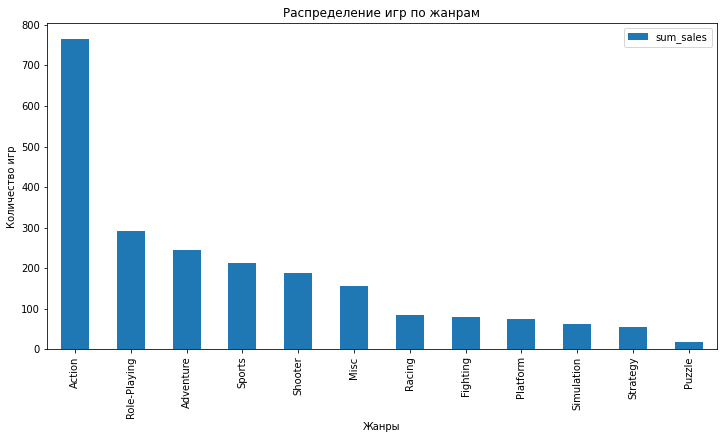

In [225]:
(
    data_2013
    .pivot_table(index='genre', values = 'sum_sales', aggfunc='count')
    .sort_values(by='sum_sales', ascending=False)
    .plot(kind = 'bar',
          figsize=(12,6),
          title = 'Распределение игр по жанрам')
) 
plt.xlabel('Жанры')
plt.ylabel('Количество игр')
plt.show();

По графику видно, что наибольшее количество игр выпущено в жанре "Action" (более 700), наименьшее в жанре "Puzzle" 

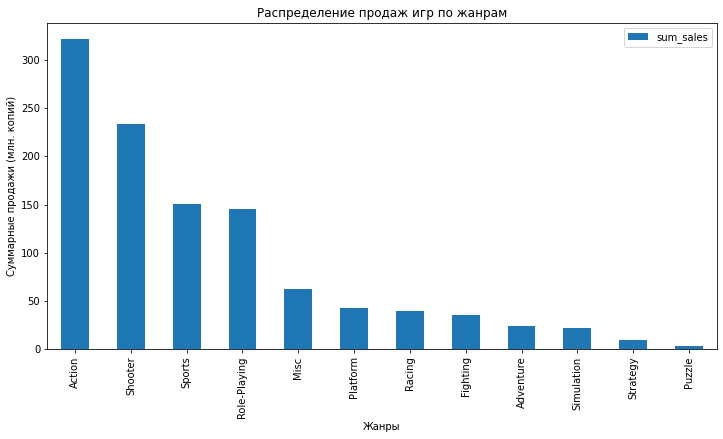

In [226]:
(
    data_2013
    .pivot_table(index='genre', values = 'sum_sales', aggfunc='sum')
    .sort_values(by='sum_sales', ascending=False)
    .plot(kind = 'bar',
          figsize=(12,6),
          title = 'Распределение продаж игр по жанрам')
)
plt.xlabel('Жанры')
plt.ylabel('Суммарные продажи (млн. копий)')
plt.show();

Первое место по количеству проданных копий занимает жанр "Action", второе "Shooter", на третьем и четвертом соответсвенно - "Sports" и "Role-Playing".

Построим диаграмму размаха продаж для жанров

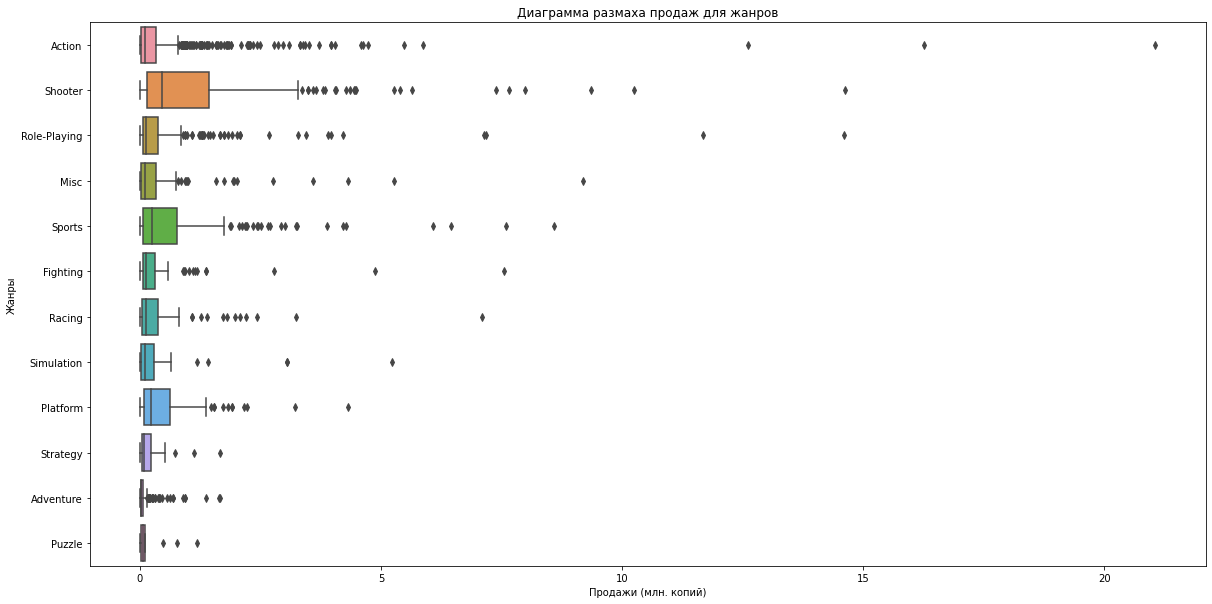

In [227]:
fig, ax = plt.subplots(figsize=(20, 10))
genre = data_2013['genre']
sns.boxplot(x=data_2013['sum_sales'], y=genre, ax=ax)
plt.title('Диаграмма размаха продаж для жанров')
plt.xlabel('Продажи (млн. копий)')
plt.ylabel('Жанры')
plt.show();

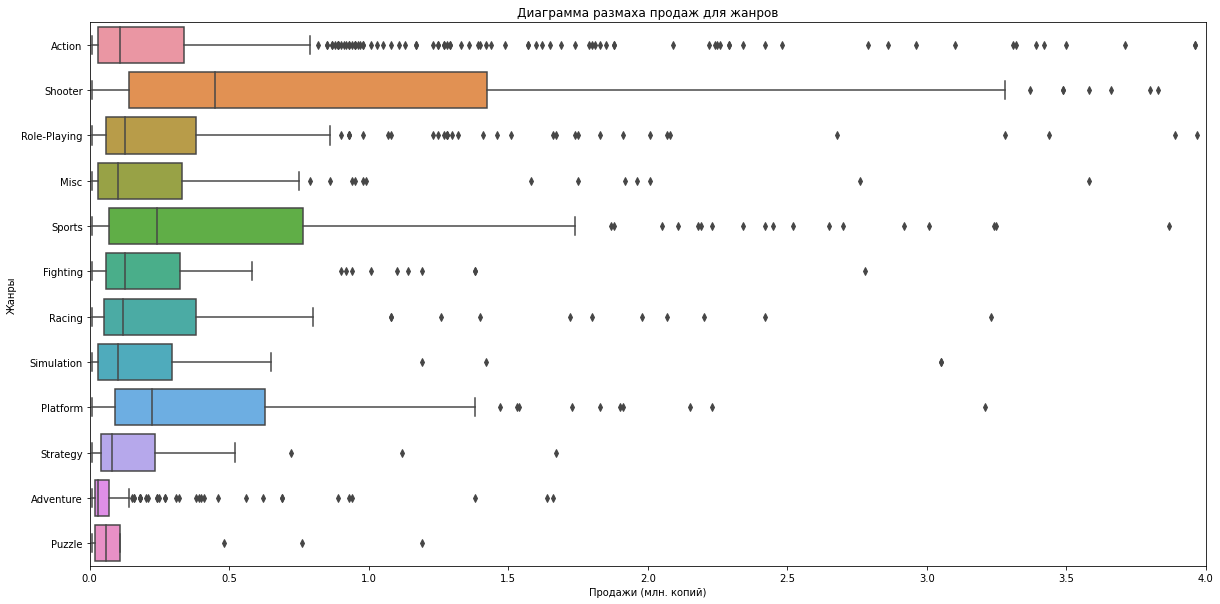

In [228]:
fig, ax = plt.subplots(figsize=(20, 10))
genre = data_2013['genre']
sns.boxplot(x=data_2013['sum_sales'], y=genre, ax=ax)
plt.title('Диаграмма размаха продаж для жанров')
plt.xlabel('Продажи (млн. копий)')
plt.ylabel('Жанры')
plt.xlim(0, 4)
plt.show();

In [229]:
data_2013.query('genre=="Action"').sort_values(by='sum_sales', ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
149,The Last of Us,PS3,2013,Action,2.41,2.18,0.28,0.99,95.0,9.1,M,5.86
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
225,The Last of Us,PS4,2014,Action,1.88,2.00,0.07,0.77,NaN,NaN,unkown,4.72
231,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,86.0,8.1,T,4.62
235,Luigi's Mansion: Dark Moon,3DS,2013,Action,1.80,1.39,1.11,0.29,86.0,8.4,E,4.59
295,Watch Dogs,PS4,2014,Action,1.40,1.90,0.11,0.64,80.0,6.3,M,4.05
304,Assassin's Creed: Unity,PS4,2014,Action,1.19,2.07,0.08,0.62,70.0,4.9,M,3.96


In [230]:
data_2013.query('name == "Grand Theft Auto V"')['sum_sales'].sum()/data_2013.query('genre == "Action"')['sum_sales'].sum()

0.1757852549165812

На данном графике обращает на себя внимание ящик с усами для жанра Shooter. По нему можно видеть, что 50% игр раскупается в количестве от 1.3 млн экземпляров, количество игр с аномально высокими продажами невелико, а медианная продажа составляет около 400 млн. копий. Также довольно высокие медианные продажи у жанров Sports и Platform. Совершенно иная ситуация у жанра Action. Здесь можно увидеть, что медианная продажа составляет около 100 тыс. копий, что в четыре раза меньше, чем у Shooter, то есть высокие суммарные продажи Action позволяющие занимать ему 1 место объясняются продажами небольшого количества сверхпопулярных игр. Продажи только одной игры Grand Theft Auto V составили 18% от суммарных продаж. Тот самый случай когда количество не перешло в качество.

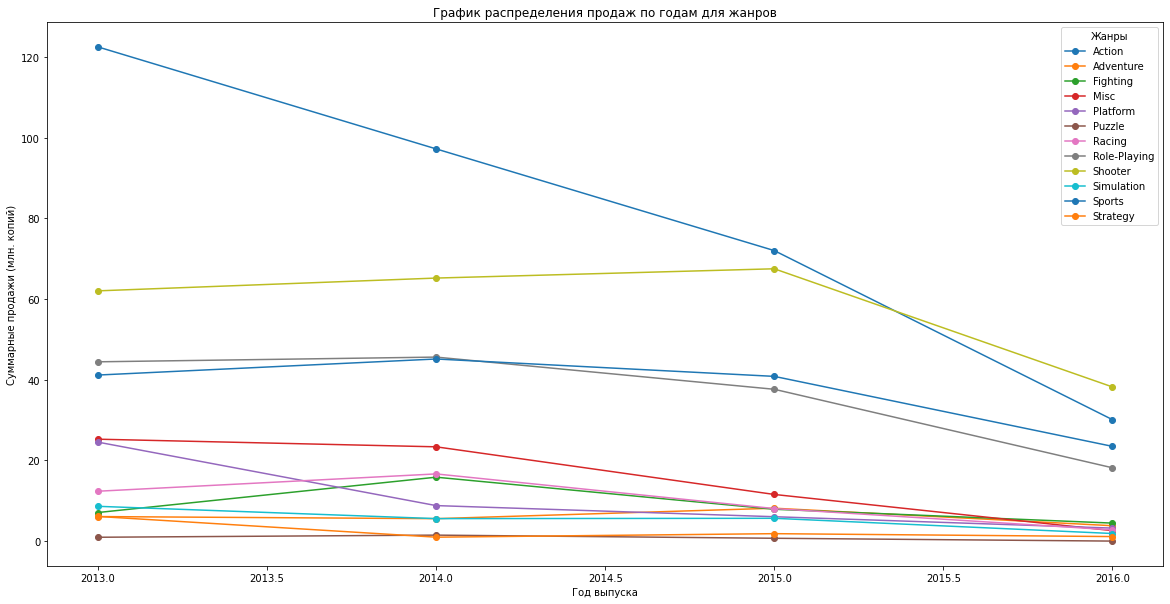

In [231]:
#построим график распределения продаж по годам для жанров, начиная с 2013 года
(
    data_2013
    .pivot_table(index=['year_of_release'], columns=['genre'], values='sum_sales', aggfunc='sum')
    .plot(figsize=(20,10), style='-o', title='График распределения продаж по годам для жанров')
)
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи (млн. копий)')
plt.legend(title='Жанры')
plt.show();

Продажи Action падают из года в год, зато продажи Shooter, Role-Playing, Sports на удивление стабильны.

Выводы: средний срок жизни платформы 8-10 лет, к платформам, находящимся в расцвете сил, можно отнести PS4 и XOne, "бальзаковский" возраст у платформ WiiU и 3DS, а вот платформы X360 и PS3 уходят с арены. Между продажами на всех популярных платформах и оценками критиков есть прямая зависимость, а вот зависимости продаж от оценок пользователей не наблюдается. Среди пользователей в разрезе медианных продаж популярными являются жанры Shooter, Sports и Platform, а вот по сумме продаж четверка лидеров Action, Shooter, Role-Playing и Sports.

### Составим портрет пользователя каждого региона .

Определим самые популярные платформы для пользователей из Северной Америки, Европы и Японии. Для этого определим суммарные продажи для каждой платформы в регионе, выделим топ-5, остальные платформы объединим в категорию 'Другие' и построим круговые диаграммы.

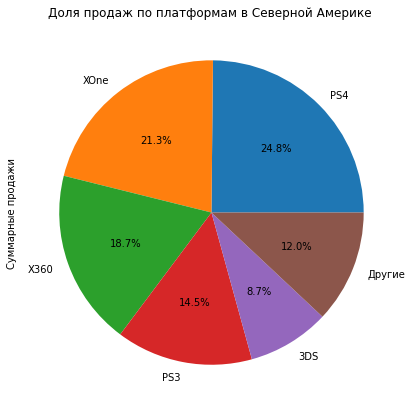

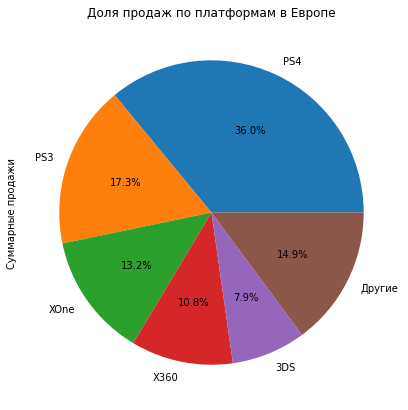

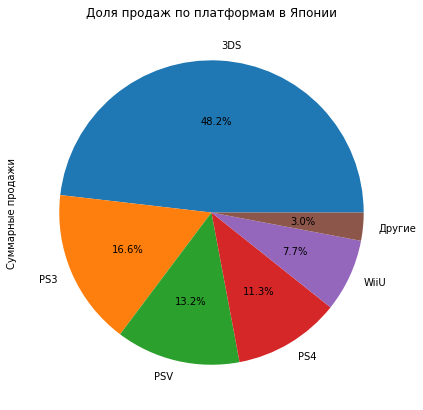

In [232]:
regiоns={'na_sales':'Доля продаж по платформам в Северной Америке ',
         'eu_sales':'Доля продаж по платформам в Европе',
         'jp_sales':'Доля продаж по платформам в Японии'}
regions_items = regiоns.items()
for key, value in regions_items:
    data_top = data_2013.pivot_table(index='platform', values=key, aggfunc='sum')\
    .sort_values(by=key, ascending=False)
    sum_low=data_top[key][5:].sum()
    data_top_5=data_top.reset_index().head()
    data_top_5.columns=['Платформа', 'Суммарные продажи']
    data_top_5.loc[len(data_top_5.index)] = ['Другие', sum_low]
    data_top_5 = data_top_5.set_index('Платформа')
    data_top_5.plot(title=value, kind='pie', y='Суммарные продажи', autopct='%1.1f%%', legend=None, figsize=(7,7))    

ТОП-5 популярных платформ в Северной Америке в порядке убывания популярности: PS4, XOne, X360, PS3, 3DS.
    
ТОП-5 популярных платформ в Европе в порядке убывания популярности: PS4, PS3, XOne, X360, 3DS. 
Замечаем, что список платформ один и тот же, с той лишь разницей, что PS4 и PS3 в Европе значительно популярней, чем в Северной Америке. С платформами XOne, X360 все наоборот, в Северной Америке они значительно популярней, чем в Европе. Это легко объясняется тем, что данные платформы разработала американская компания Microsoft, и конечно же самые высокие продажи будут в стране разработки. 
ТОП-5 популярных платформ в Японии в порядке убывания популярности: 3DS, PS3, PSV, PS4, WiiU. Практически половину продаж составляет местная японская платформа 3DS от Nintendo. Также замечаем, что все 5 популярных платформ  - японские. В стране настолько развита игровая индустрия, что она не нуждается в чужих разработках. 

Определим самые популярные жанры для пользователей из Северной Америки, Европы и Японии.

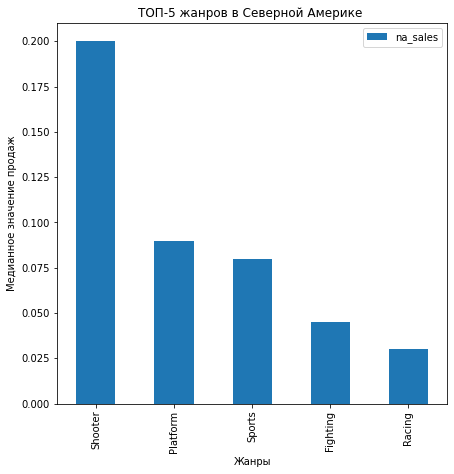

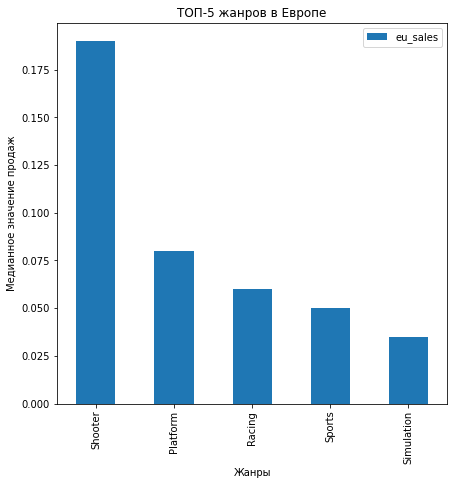

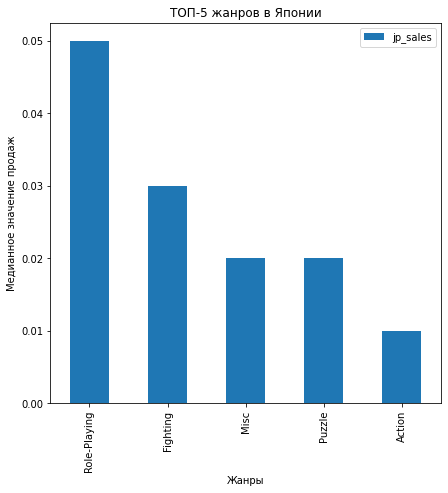

In [233]:
regiоns1={'na_sales':'ТОП-5 жанров в Северной Америке ',
         'eu_sales':'ТОП-5 жанров в Европе',
         'jp_sales':'ТОП-5 жанров в Японии'}
regions1_items = regiоns1.items()
for key, value in regions1_items:
    data_regions = data_2013.pivot_table(index='genre', values=key, aggfunc='median')\
    .sort_values(by=key, ascending=False)\
    .head().plot(title=value, kind='bar', xlabel='Жанры', ylabel='Медианное значение продаж', y=key, figsize=(7,7))

ТОП-5 популярных жанров в Северной Америке в порядке убывания популярности: Shooter, Platform, Sports, Fighting, Racing.
    
ТОП-5 популярных платформ в Европе в порядке убывания популярности: Shooter, Platform, Sports, Racing, Simulation. 
Замечаем, что список платформ один практически один и тот же, т.е. предпочтения у североамериканцев и европейцев схожи. Shooter впереди со значительным отрывом. 

ТОП-5 популярных платформ в Японии в порядке убывания популярности: Role-Playing, Fighting, Misc, Puzzle, Action. В отличие от североамериканцев и европейцев, которые предпочитают шутеры, японцам больше нравятся ролевые игры.   

Определим, как влияет рейтинг ESRB на продажи в регионах.

«EC» («Early childhood») — «Для детей младшего возраста»

«E» («Everyone») — «Для всех»: 

«E10+» («Everyone 10 and older») — «Для всех старше 10 лет»: 

«T» («Teen») — «Подросткам 13—16 лет»

«M» («Mature») — «От 17 лет»: 


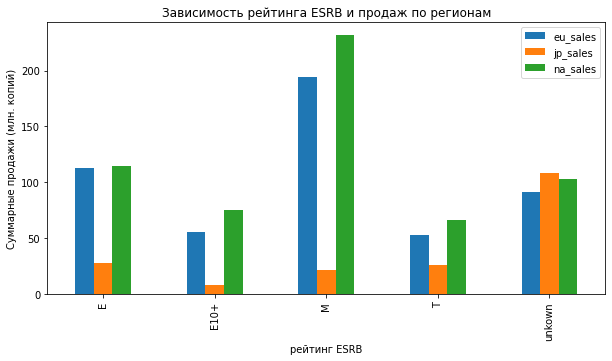

In [234]:
(
    data_2012
    .pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
    .plot(kind='bar', figsize=(10,5), title='Зависимость рейтинга ESRB и продаж по регионам')
)
plt.xlabel('рейтинг ESRB')
plt.ylabel('Суммарные продажи (млн. копий)')
plt.show();

Вывод: Типичный североамериканский  и европейский пользователь имеет возраст от 17 лет, предпочитает играть в игры жанров Shooter, Platform и Sports на приставках PS4, PS3, XOne, X360. 

Типичный японский пользователь предпочитает игры жанрoв Role-Playing и Fighting на портативной консоли 3DS производства Nintendo. К сожалению, нельзя определить возрастную категорию большинства игр в Японии, т.к. рейтинг ESRB распространяется только на игры разработанные в США и Канаде, рейтингами японских игр занимается местная компания CERO. 
  


### Проверка гипотез.


Проверяем гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
    Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC равны.
    Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC равны. 

In [237]:
#сформируем выборки из датасета, удаляем при этом пропущенные значения:
score_xone = data_2013.query('platform == "XOne"').dropna(subset=['user_score'])['user_score']
len(score_xone)

182

In [238]:
score_pc = data_2013.query('platform == "PC"').dropna(subset=['user_score'])['user_score']
len(score_pc)

155

In [240]:
#если имеем выборки разного размера, то при использовании метода st.ttest_ind указываем значение параметра equal_var=False
results = st.ttest_ind(score_xone, score_pc, equal_var=False)
alpha = 0.05 # alpha = задаем значение уровня значимости
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Вывод: при уровне значимости равном 0.05 не получилось отвергнуть нулевую гипотезу, а значит что с большой долей вероятности средние пользовательские рейтинги платформ XOne и PC не имеют статистически значимых отличий.

Проверяем гипотезу: Средние пользовательские рейтинги жанров Action и Sports разные.
    Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports равны.
    Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports не равны. 

In [241]:
score_action = data_2013.query('genre == "Action"').dropna(subset=['user_score'])['user_score']
len(score_action)

389

In [242]:
score_sports = data_2013.query('genre == "Sports"').dropna(subset=['user_score'])['user_score']
len(score_sports)

160

In [243]:
#если имеем выборки разного размера, то при использовании метода st.ttest_ind указываем значение параметра equal_var=False  
results = st.ttest_ind(score_action, score_sports, equal_var=False) 
alpha = 0.05 # alpha = задаем значение уровня значимости
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.4460039700704315e-20
Отвергаем нулевую гипотезу


Вывод: при уровне значимости равном 0.05 отвергаем нулевую гипотезу, а значит средние пользовательские рейтинги жанров Action и Sports с большой вероятностью имеют статистически значимые отличия.

Общий вывод: В данном проекте была произведена работа по анализу данных о продажах игр, оценках пользователей и экспертов, жанрах и платформах. Наша цель состояла в выявлении закономерностей успешности компьютерных игр. В первой части проекта мы изучили предоставленные данные. Далее была выполнена предобработка данных, а именно переименованы столбцы, обработаны пропущенные значения, удалены строки с пропущенными данными. Во второй части проекта мы изучили параметры данных, используя гистограммы, ящики с усами и сводные таблицы. Эти методы позволили нам определить факторы, которые влияют на продажи игры. Получили следующие выводы:
 Потенциально популярная игра -  это:
 - игра, разработанная для современных платформ PS4, XOne, 3DS, Wiiu;
 - игра с высокой оценкой критиков,
 - игра в жанре Shooter, Sports, Platform, Role-Playing.
 - игра в жанре Action, являющаяся продолжением суперпопулярной игры. 
 
Также мы составили портреты пользователей из Северной Америки, Европы и Японии.
Типичный североамериканский и европейский пользователи имеют возраст от 17 лет, предпочитают играть в игры жанров Shooter, Platform и Sports на приставках PS4, PS3, XOne, X360.

Типичный японский пользователь предпочитает игры жанрoв Role-Playing и Fighting на портативной консоли 3DS производства Nintendo. 
 
Рекомендации: усовершенствовать механизм сбора данных по оценкам критиков, пользователей, возрастного рейтинга. Включить в датасет возрастной рейтинг японской компании CERO